# 2. Import Libraries
• Import the necessary libraries. It is your choice on which libraries to import and
where in your code to import them

In [1]:
# CodeBlock Section 2 Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
from sqlalchemy import create_engine
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 3. Import Data from a URL
• Import CantonPoliceDept_HW03.csv and name it df_canton.
• Import CantonPoliceDept_HW03_Week51.csv and name it df_canton_new

In [2]:
# CodeBlock Section 3
# importing df_canton
df_canton = pd.read_csv('data/CantonPoliceDept_HW03.csv', index_col = None, header = 0 )
df_canton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11847 entries, 0 to 11846
Columns: 118 entries, SUB_YEAR_WEEK to ALL_Status
dtypes: float64(18), int64(96), object(4)
memory usage: 10.7+ MB


In [3]:
# CodeBlock Section 3
# importing df_canton_new
df_canton_new = pd.read_csv('data/CantonPoliceDept_HW03_Week51.csv', index_col = None, header = 0 )
df_canton_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 113 entries, SUB_YEAR_WEEK to call_Burglary_comp
dtypes: float64(18), int64(92), object(3)
memory usage: 18.7+ KB


# 4.1 Summarize to identify the top 5 highest crime rates
Using df_canton:
• Consider call_ALL as the total crime rate.
• Identify the top 5 crime rates using different summarization techniques.

In [4]:
# CodeBlock Subsection 4.1
# checking data
df_canton.head(5)

,SUB_YEAR_WEEK,SUB_YEAR_WEEK_target,call_ALL_target,call_Burglary_target,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp,Burg_Status,ALL_Status
0,2008_38_ZONE1D,2008_39_ZONE1D,47,1,ZONE1D,38,9,2008,2008_38,17,4,0,8,2,3,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,1,2,1,3,1,0,4,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,6,6,0,0,1,1,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0.267324,0.011014,0.006884,0.109224,0.028683,0.732676,1657,1.000000,0.042245,0.166566,0.064575,0.050694,31,28,32,33225,35873.00000,32084,44433,20857,153,9,1,1
1,2008_38_ZONE2B,2008_39_ZONE2B,2,0,ZONE2B,38,9,2008,2008_38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.580327e+07,66,4049,0.506545,0.493455,2079,0.970659,0.903800,0.055315,3893,0.278705,0.015155,0.029026,0.062677,0.007706,0.721295,1107,0.953026,0.126468,0.299006,0.009033,0.000000,30,32,32,74560,55953.00000,56630,112939,30678,1,1,0,1
2,2008_38_ZONE1C,2008_39_ZONE1C,29,1,ZONE1C,38,9,2008,2008_38,19,4,0,6,3,5,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,2,2,0,0,3,0,0,1,1,1,2,1,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,1,0,0,0,0,0,2,3,0,0,2,5,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,190,0,1,1
3,2008_38_ZONE3D,2008_39_ZONE3D,20,2,ZONE3D,38,9,2008,2008_38,11,3,0,2,1,4,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,0,0,0,0,0,7.276253e+07,199,6399,0.470386,0.529614,3302,0.949727,0.833434,0.068443,6241,0.331838,0.014741,0.006569,0.173530,0.011216,0.668162,2059,0.964546,0.123361,0.199611,0.052938,0.023798,32,32,29,51135,70660.00000,48053,50309,32859,77,0,1,1
4,2008_38_ZONE4B,2008_39_ZONE4B,10,0,ZONE4B,38,9,2008,2008_38,8,4,0,2,1,1,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1

In [5]:
# CodeBlock Subsection 4.1
# checking data
df_canton_new.head(5)

,SUB_YEAR_WEEK,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
0,2018_50_ZONE5B,ZONE5B,50,12,2018,2018_50,38,4,3,6,6,8,7,4,0,0,0,0,0,0,0,0,0,0,0,38,0,0,2,2,1,8,0,0,0,1,1,2,0,0,2,0,0,0,10,1,1,7,3,0,0,3,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,6,6,0,0,7,8,0,0,0,0,0,0,7.126647e+07,233,9783,0.538485,0.461515,4522,0.984299,0.806502,0.137107,9206,0.360200,0.025092,0.017054,0.162177,0.044319,0.639800,3021,0.974181,0.072824,0.113870,0.042370,0.096326,27,27,28,29922,37845.00000,29634,47085,17043,228,12
1,2018_50_ZONE1C,ZONE1C,50,12,2018,2018_50,26,8,3,4,4,2,2,3,0,0,0,0,0,0,0,0,0,0,0,26,0,3,3,0,1,1,0,0,0,0,3,1,0,0,0,0,0,0,9,1,0,4,5,0,0,1,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,4,0,0,7,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,260,0
2,2018_50_ZONE6C,ZONE6C,50,12,2018,2018_50,29,9,3,4,2,1,5,6,0,0,0,0,0,0,0,0,0,0,0,30,0,1,4,0,0,1,0,0,0,1,3,1,0,0,0,0,0,0,10,1,2,6,0,0,0,2,1,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,6,0,0,8,1,0,0,0,0,0,0,8.392070e+07,176,7759,0.447609,0.552391,3688,0.962039,0.891811,0.042570,7608,0.218191,0.009989,0.024711,0.046793,0.005783,0.781809,2492,0.936196,0.184992,0.292937,0.046549,0.023274,38,37,40,48009,47873.00000,47555,54849,25295,232,0
3,2018_50_ZONE3E,ZONE3E,50,12,2018,2018_50,68,14,7,15,4,8,8,11,0,0,0,0,0,0,0,0,0,0,0,67,0,1,4,1,1,18,0,0,0,2,3,2,0,1,2,0,0,1,17,2,3,9,4,1,1,1,2,0,1,0,0,0,0,0,4,0,0,0,0,0,1,0,1,10,17,0,0,9,15,0,0,0,0,0,0,8.508794e+07,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.00000,62030,58637,15470,408,6
4,2018_50_ZONE7C,ZONE7C,50,12,2018,2018_50,21,2,4,4,3,5,3,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,2,0,1,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,4,0,0,3,2,0,0,0,0,0,0,5.363035e+07,238,8040,0.478234,0.521766,3991,0.950138,0.842145,0.095966,7621,0.267419,0

# Maximum call_ALL values of historical data based on top 5 subzones.

In [6]:
# CodeBlock Subsection 4.1
# showing the max call all for subzone ZONE1D
df_canton_ZONE1D = df_canton[df_canton['Subzone'] =='ZONE1D']
df_canton_ZONE1D['call_ALL'].max()

77

In [7]:
# CodeBlock Subsection 4.1
# showing the max call all for subzone ZONE2B
df_canton_ZONE2B = df_canton[df_canton['Subzone'] =='ZONE2B']
df_canton_ZONE2B['call_ALL'].max()

25

In [8]:
# CodeBlock Subsection 4.1
# showing the max call all for subzone ZONE1C
df_canton_ZONE1C = df_canton[df_canton['Subzone'] =='ZONE1C']
df_canton_ZONE1C['call_ALL'].max()

63

In [9]:
# CodeBlock Subsection 4.1
# showing the max call all for subzone ZONE3D
df_canton_ZONE3D = df_canton[df_canton['Subzone'] =='ZONE3D']
df_canton_ZONE3D['call_ALL'].max()

30

In [10]:
# CodeBlock Subsection 4.1
# showing the max call all for subzone ZONE4B
df_canton_ZONE4B = df_canton[df_canton['Subzone'] =='ZONE4B']
df_canton_ZONE4B['call_ALL'].max()

40

In [16]:
# CodeBlock Subsection 4.1
# data frame for top 5 Subzones from historical data

TOP5_list = ['ZONE1D','ZONE2B','ZONE1C','ZONE3D','ZONE4B']

df_canton_TOP5 = df_canton[df_canton['Subzone'].isin(TOP5_list)]
df_canton_TOP5.head()

,SUB_YEAR_WEEK,SUB_YEAR_WEEK_target,call_ALL_target,call_Burglary_target,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp,Burg_Status,ALL_Status
0,2008_38_ZONE1D,2008_39_ZONE1D,47,1,ZONE1D,38,9,2008,2008_38,17,4,0,8,2,3,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,1,2,1,3,1,0,4,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,6,6,0,0,1,1,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0.267324,0.011014,0.006884,0.109224,0.028683,0.732676,1657,1.000000,0.042245,0.166566,0.064575,0.050694,31,28,32,33225,35873.00000,32084,44433,20857,153,9,1,1
1,2008_38_ZONE2B,2008_39_ZONE2B,2,0,ZONE2B,38,9,2008,2008_38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.580327e+07,66,4049,0.506545,0.493455,2079,0.970659,0.903800,0.055315,3893,0.278705,0.015155,0.029026,0.062677,0.007706,0.721295,1107,0.953026,0.126468,0.299006,0.009033,0.000000,30,32,32,74560,55953.00000,56630,112939,30678,1,1,0,1
2,2008_38_ZONE1C,2008_39_ZONE1C,29,1,ZONE1C,38,9,2008,2008_38,19,4,0,6,3,5,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,2,2,0,0,3,0,0,1,1,1,2,1,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,1,0,0,0,0,0,2,3,0,0,2,5,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,190,0,1,1
3,2008_38_ZONE3D,2008_39_ZONE3D,20,2,ZONE3D,38,9,2008,2008_38,11,3,0,2,1,4,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,0,0,0,0,0,7.276253e+07,199,6399,0.470386,0.529614,3302,0.949727,0.833434,0.068443,6241,0.331838,0.014741,0.006569,0.173530,0.011216,0.668162,2059,0.964546,0.123361,0.199611,0.052938,0.023798,32,32,29,51135,70660.00000,48053,50309,32859,77,0,1,1
4,2008_38_ZONE4B,2008_39_ZONE4B,10,0,ZONE4B,38,9,2008,2008_38,8,4,0,2,1,1,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1

# 4.2 Visualize the top 5 highest crime rates
• Using different charts and plots, visualize your results to make a compelling argument
for more resources for these 5 Subzones.

Text(0, 0.5, 'TOP 5 Subzones')

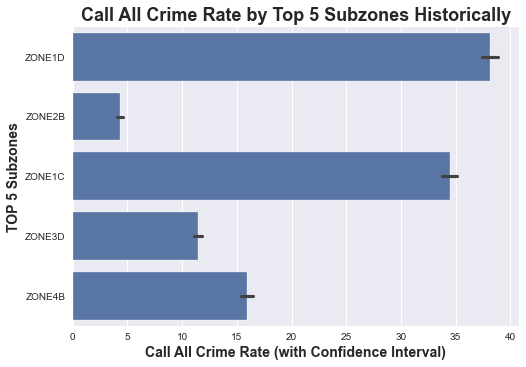

In [99]:
# CodeBlock SubSection 4.2
# barplot for top 5 subzones

sns.barplot(x= 'call_ALL', y= 'Subzone', data = df_canton_TOP5, color = 'b')
plt.title('Call All Crime Rate by Top 5 Subzones Historically', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Call All Crime Rate (with Confidence Interval)', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('TOP 5 Subzones', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')


Text(0, 0.5, 'Subzone')

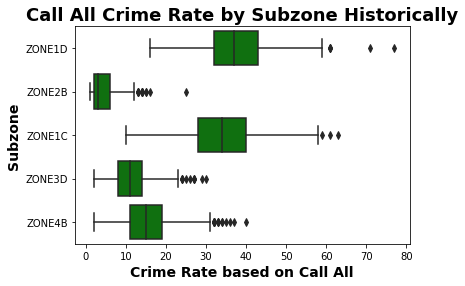

In [20]:
# CodeBlock SubSection 4.2
# boxplot for top 5 subzones
sns.boxplot(x= 'call_ALL', y= 'Subzone', data = df_canton_TOP5, color = 'g')
plt.title('Call All Crime Rate by Subzone Historically', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Crime Rate based on Call All', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Subzone', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'call_ALL')

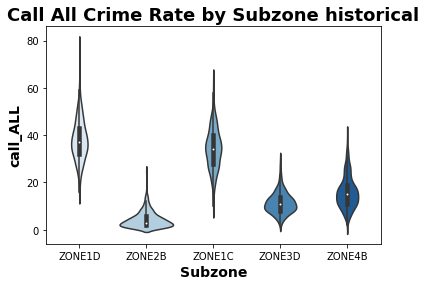

In [21]:
# CodeBlock SubSection 4.2
# violinplot for top 5 subzones

sns.violinplot(y = "call_ALL", x = "Subzone", data = df_canton_TOP5, palette = "Blues")
plt.title('Call All Crime Rate by Subzone historical', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Subzone', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('call_ALL', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')




# 4.3 Explain your results
• Using Markdown, explain your results and make a compelling case for why you should
create a predictive model.
o Identify the top 5 – highest crime rates.
o How would a predictive model help to reduce crime rates, especially in these 5
Subzones.

 In the Bar chart, ZONE1D shows to be the highest with a call all crime rate around 37. ZONE1C is the second highest with a call all crime rate around 34. ZONE4B is the third highest with a call all crime rate around 17. ZONE3D is the fourth highest with a call all crime rate around 12. ZONE2B is the lowest with a call all crime rate around 4.


 In the Boxplot, ZONE1D is the highest call all crime rate. Majority of the frequency is between 33 and 44. The median is around 36.  There are 3 outliers, the highest is around 77. The second highest outlier is around 73. The median is around 33. The last outliers is around 62. ZONE1C is the second highest call all crime rate. The median is around 12. Majority of the frequency is between 29 and 39. There are 3 outliers, the highest outlier is at 65, followed by the second outlier at 62, followed by the lowest outlier at 61. ZONE4B is the third highest call all crime rate with majority of it between 12 and 18. The median is around 15. There are several outliers with the highest being at 41. The rest of the outliers are between 31 and 37. ZONE2B is the lowest call all crime rate. Majority of the frequency is between 4 and 7 with a median around 5. There are 5 outliers, the highest at 28, the remaining 4 are between 12 and 20. The boxplot has the same findings as the bar chart with additional insights in the variability of the subzone crime rates.

 In the violin plot, ZONE3D and ZONE4B are close to being normal distributions. Typically the kurtosis values around 3.  The variability is within 1 or 2 of the standard deviations. ZONE1D and ZONE1C is platikurtic which indicates greater variability around the median. ZONE2B is leptokurtic which indicates lesser variability around the median. 

 Creating a predictive model is imperative to understand which feature variables are related to the overall call all crime rate by zone. Moreover, the information of the graphs so far seems to suggest that analyzing subzones ZONE1D and ZONE1C would be appropriate because they have these subzones have the highest call all crime rate. From the violin plot, these subzones have the greatest variability around the median. Therefore, we should understand from a predictive model what is causing these zones to have greater variability.  
A predictive model would help identify the feature variables that are related to the frequency of the call all crime rate by subzones. The predictive modeling results would C.P.D. to allocate resources to the monitoring of the feature variables that are causing the frequency of call all crime rates in these subzones. 


5.1 Create the X and y datasets
• Using the df_canton dataframe, create the X and y datasets.
• Create the y dataset – the target variable.
o For this assignment, the prediction will be based on all calls, which is the
indicator for crimes that will be used. The column that will be target variable will
be call_ALL_target.
• Create the X dataset – features.
o Using df_canton, create X by dropping columns that do not belong in your
model as a feature.
o For more information on which columns to drop, refer to the Python video -
C3.S2.Py04.

In [22]:
# CodeBlock SubSection 5.1
# checking data
df_canton.head()

,SUB_YEAR_WEEK,SUB_YEAR_WEEK_target,call_ALL_target,call_Burglary_target,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp,Burg_Status,ALL_Status
0,2008_38_ZONE1D,2008_39_ZONE1D,47,1,ZONE1D,38,9,2008,2008_38,17,4,0,8,2,3,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,1,2,1,3,1,0,4,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,6,6,0,0,1,1,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0.267324,0.011014,0.006884,0.109224,0.028683,0.732676,1657,1.000000,0.042245,0.166566,0.064575,0.050694,31,28,32,33225,35873.00000,32084,44433,20857,153,9,1,1
1,2008_38_ZONE2B,2008_39_ZONE2B,2,0,ZONE2B,38,9,2008,2008_38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.580327e+07,66,4049,0.506545,0.493455,2079,0.970659,0.903800,0.055315,3893,0.278705,0.015155,0.029026,0.062677,0.007706,0.721295,1107,0.953026,0.126468,0.299006,0.009033,0.000000,30,32,32,74560,55953.00000,56630,112939,30678,1,1,0,1
2,2008_38_ZONE1C,2008_39_ZONE1C,29,1,ZONE1C,38,9,2008,2008_38,19,4,0,6,3,5,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,2,2,0,0,3,0,0,1,1,1,2,1,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,1,0,0,0,0,0,2,3,0,0,2,5,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,190,0,1,1
3,2008_38_ZONE3D,2008_39_ZONE3D,20,2,ZONE3D,38,9,2008,2008_38,11,3,0,2,1,4,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,0,0,0,0,0,7.276253e+07,199,6399,0.470386,0.529614,3302,0.949727,0.833434,0.068443,6241,0.331838,0.014741,0.006569,0.173530,0.011216,0.668162,2059,0.964546,0.123361,0.199611,0.052938,0.023798,32,32,29,51135,70660.00000,48053,50309,32859,77,0,1,1
4,2008_38_ZONE4B,2008_39_ZONE4B,10,0,ZONE4B,38,9,2008,2008_38,8,4,0,2,1,1,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1

In [23]:
# CodeBlock SubSection 5.1
# checking column names 
df_canton.columns

Index(['SUB_YEAR_WEEK', 'SUB_YEAR_WEEK_target', 'call_ALL_target',
       'call_Burglary_target', 'Subzone', 'WEEK', 'MONTH', 'YEAR', 'YEAR_WEEK',
       'call_ALL',
       ...
       'MedianAge_Female', 'HouseholdIncome_Median',
       'HouseholdIncome_Median_25to44', 'HouseholdIncome_Median_65andover',
       'HouseholdIncome_Median_45to64', 'Income_PerCapita', 'call_ALL_comp',
       'call_Burglary_comp', 'Burg_Status', 'ALL_Status'],
      dtype='object', length=118)

In [24]:
# CodeBlock SubSection 5.1
# creating data frame with no columns that are needed for analysis

df_canton_clean = df_canton.drop(['Subzone','SUB_YEAR_WEEK_target', 'YEAR_WEEK', 'SUB_YEAR_WEEK', 'call_ALL_target', 'call_Burglary_target', 'Burg_Status', 'ALL_Status', 'WEEK', 'MONTH', 'YEAR'], axis = 1)
df_canton_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11847 entries, 0 to 11846
Columns: 110 entries, WEEK to call_Burglary_comp
dtypes: float64(18), int64(92)
memory usage: 9.9 MB


In [25]:
# CodeBlock SubSection 5.1
# creating x and y data sets
X = df_canton_clean
y = df_canton['call_ALL_target']

# 5.2 Create the training and test datasets
• Split the data for training and test datasets.
o Using train_test_split, split X and y with a test size of 0.30 and a random state of 42

In [26]:
# CodeBlock SubSection 5.2
# importing train test split
from sklearn.model_selection import train_test_split

In [27]:
# CodeBlock SubSection 5.2
# creating x and y train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state
= 42)

In [28]:
# CodeBlock SubSection 5.2
# checking data
y_train.head()

2865    77
4341     7
6388     7
2291     5
6375     5
Name: call_ALL_target, dtype: int64

In [29]:
# CodeBlock SubSection 5.2
# checking data
X_train.head()

,WEEK,MONTH,YEAR,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
2865,14,4,2011,74,7,8,16,8,7,15,7,0,0,0,68,0,0,0,0,0,0,0,0,0,3,12,1,2,15,0,0,1,2,10,1,2,2,0,0,3,0,9,0,2,3,0,0,0,1,0,1,3,0,3,0,0,5,12,0,0,1,0,0,0,0,1,8,19,1,0,9,4,0,0,0,0,0,0,85087944.85,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.0,62030,58637,15470,444,6
4341,28,7,2012,12,4,2,5,0,1,2,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,5,0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,1,1,3,0,0,2,1,0,0,0,0,0,0,53630347.61,238,8040,0.478234,0.521766,3991,0.950138,0.842145,0.095966,7621,0.267419,0.014959,0.015090,0.037265,0.014171,0.732581,2452,0.987765,0.105628,0.201060,0.024470,0.033850,36,36,36,79633,85153.0,51478,89011,30844,36,0
6388,18,4,2014,5,3,1,0,2,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,10,0
2291,40,10,2010,5,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,10,2
6375,17,4,2014,2,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,4,0


In [30]:
# CodeBlock SubSection 5.2
# checking data
X_test.head()

,WEEK,MONTH,YEAR,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
8188,45,11,2015,6,0,0,0,2,0,1,3,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,9.676484e+07,140,5753,0.481662,0.518338,2813,0.944543,0.832919,0.093139,5495,0.287352,0.049136,0.019108,0.044586,0.007825,0.712648,1764,0.953515,0.142857,0.274376,0.003968,0.007937,34,34,35,71448,74738.0,63880,75549,27722,6,0
900,28,7,2009,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.741946e+07,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,2,0
3898,8,2,2012,17,3,0,4,4,1,5,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,2,0,2,3,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1,1,2,0,0,3,3,0,0,0,0,0,0,1.939506e+08,393,14516,0.494902,0.505098,6997,0.943976,0.864799,0.066028,14188,0.276078,0.012475,0.007189,0.046871,0.012264,0.723922,4359,0.973388,0.173434,0.331039,0.032806,0.011700,44,41,45,94733,97535.0,61745,114009,41097,34,0
9792,11,3,2017,32,9,2,6,7,3,3,2,0,0,32,0,0,0,0,0,0,0,0,0,0,1,4,0,3,5,0,2,0,1,0,1,0,3,2,0,0,0,6,2,0,2,1,0,0,3,1,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,6,7,0,0,4,4,0,0,0,0,0,0,2.196943e+07,77,2866,0.481158,0.518842,1097,0.967183,0.830447,0.058341,2763,0.264206,0.020992,0.000000,0.031849,0.027506,0.735794,905,0.955801,0.131492,0.171271,0.181215,0.028729,33,27,40,25994,31089.0,43746,27679,16862,224,0
2820,12,3,2011,21,1,4,2,1,3,3,3,0,0,17,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,0,0,0,1,3,0,0,0,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,1,6,3,0,0,1,2,0,0,0,0,0,0,2.330865e+07,68,3417,0.575066,0.424934,2025,0.984198,0.680988,0.225185,3295,0.301062,0.008801,0.004552,0.181184,0.040668,0.698938,1285,1.000000,0.062257,0.178210,0.021790,0.013230,37,38,34,52050,47114.0,81316,55827,22271,189,9


In [31]:
# CodeBlock SubSection 5.2
# checking data
y_test.head()

8188     3
900      1
3898    11
9792    41
2820    17
Name: call_ALL_target, dtype: int64

# 6.1 Finding the appropriate technique and optimal alpha
• Identify the regression technique that best identifies the most significant features.
• Using that technique, use inertia models, cross validation, and grid searches to identify
the optimal alpha value.
o NOTE: optimal alpha refers to the highest R2 score.

In [32]:
# CodeBlock SubSection 6.1
# importing all necessary libraries for ridge and lasso analysis
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [33]:
# CodeBlock SubSection 6.1
# defining lasso
lasso = Lasso(alpha=0.5, fit_intercept=True, normalize = True)

In [34]:
# CodeBlock SubSection 6.1
# checking column names
X_train.columns

Index(['WEEK', 'MONTH', 'YEAR', 'call_ALL', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday',
       ...
       'MedianAge_Total', 'MedianAge_Male', 'MedianAge_Female',
       'HouseholdIncome_Median', 'HouseholdIncome_Median_25to44',
       'HouseholdIncome_Median_65andover', 'HouseholdIncome_Median_45to64',
       'Income_PerCapita', 'call_ALL_comp', 'call_Burglary_comp'],
      dtype='object', length=110)

In [35]:
# CodeBlock SubSection 6.1
# fitting lasso model to x and y train 
lasso.fit(X_train, y_train)

Lasso(alpha=0.5, normalize=True)

In [36]:
# CodeBlock SubSection 6.1
# fitting score model to x and y test
lasso.score(X_test, y_test)

-9.05487634359492e-05

iteration 0.001 done
iteration 0.005 done
iteration 0.01 done
iteration 0.05 done
iteration 0.1 done
iteration 0.25 done
iteration 0.5 done
iteration 1 done


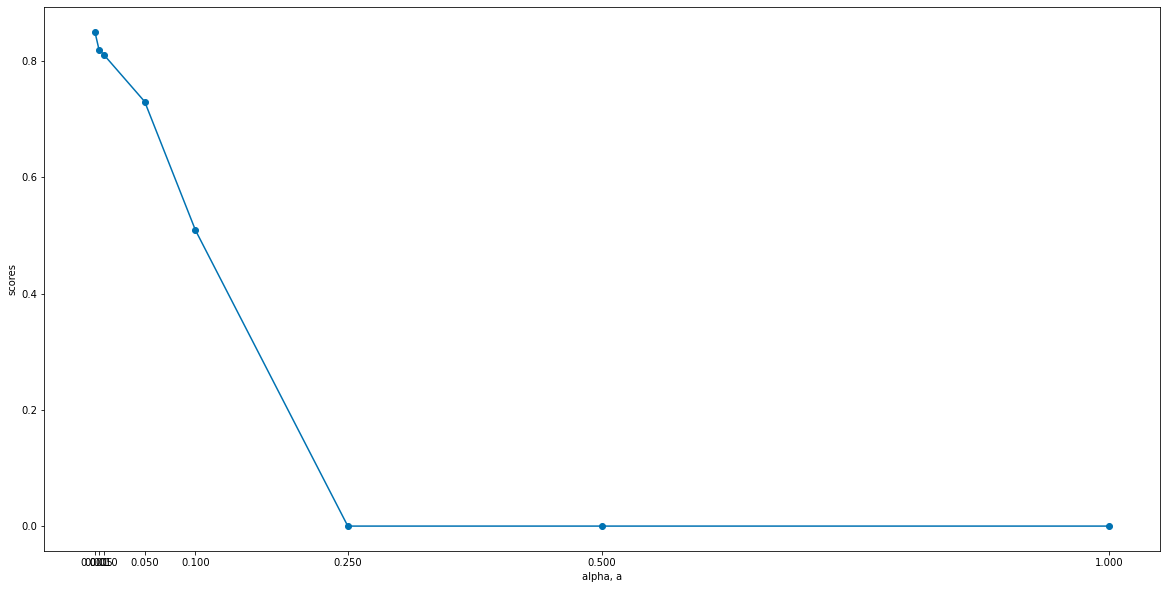

In [37]:
# CodeBlock SubSection 6.1
# plotting lasso graph

plt.figure(figsize=(20,10))
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []
for a in alphas:
 lasso = Lasso(alpha = a, fit_intercept=True, normalize = True)
 lasso.fit(X_train, y_train)
 scores.append(lasso.score(X_test, y_test))
 print("iteration {} done".format(a))
    
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [38]:
# CodeBlock SubSection 6.1
# plotting lasso regression results

lascores001 = cross_val_score(Lasso( fit_intercept=True, normalize=True, max_iter=3000,alpha=0.001), X, y, cv=5, scoring = 'r2')
lascores01 = cross_val_score(Lasso( fit_intercept=True, normalize=True, max_iter=3000, 
alpha=0.01), X, y, cv=5, scoring = 'r2')
lascores05 = cross_val_score(Lasso(fit_intercept=True, normalize=True, max_iter=3000, 
alpha=0.05), X, y, cv=5, scoring = 'r2')
lascores10 = cross_val_score(Lasso(fit_intercept=True, normalize=True, max_iter=3000, 
alpha=0.10), X, y, cv=5, scoring = 'r2')
lascores25 = cross_val_score(Lasso(fit_intercept=True, normalize=True, max_iter=3000, 
alpha=0.25), X, y, cv=5, scoring = 'r2')
lascores50 = cross_val_score(Lasso(fit_intercept=True, normalize=True, max_iter=3000, 
alpha=0.50), X, y, cv=5, scoring = 'r2')
# Put r-squared values into a dataframe with headers
scores_list = {'lambda=.001': lascores001,'lambda=.01': lascores01,'lambda=.05': lascores05, 'lambda=.10': lascores10,'lambda=.25': lascores25, 'lambda=.50': lascores50}
df_lassoscores = pd.DataFrame(scores_list)
# Show results of 10 runs for each lambda (alpha) level
print('Lasso Regression Results')
df_lassoscores

Lasso Regression Results


,lambda=.001,lambda=.01,lambda=.05,lambda=.10,lambda=.25,lambda=.50
0,0.849302,0.812419,0.722830,0.473352,-0.011766,-0.011766
1,0.866251,0.833453,0.736428,0.471653,-0.000880,-0.000880
2,0.858575,0.816840,0.728207,0.482476,-0.002593,-0.002593
3,0.836408,0.794291,0.712000,0.470890,-0.004661,-0.004661
4,0.827746,0.790465,0.709357,0.468660,-0.014922,-0.014922


In [39]:
# CodeBlock SubSection 6.1
# plotting lasso score chart results

df_lassoscores_chart = df_lassoscores.reset_index()
lasso_columns = df_lassoscores.columns
df_lassoscores_melt =pd.melt(df_lassoscores_chart, id_vars=['index'], \
value_vars=lasso_columns)
df_lassoscores_melt.head()

,index,variable,value
0,0,lambda=.001,0.849302
1,1,lambda=.001,0.866251
2,2,lambda=.001,0.858575
3,3,lambda=.001,0.836408
4,4,lambda=.001,0.827746


<AxesSubplot:xlabel='index', ylabel='value'>

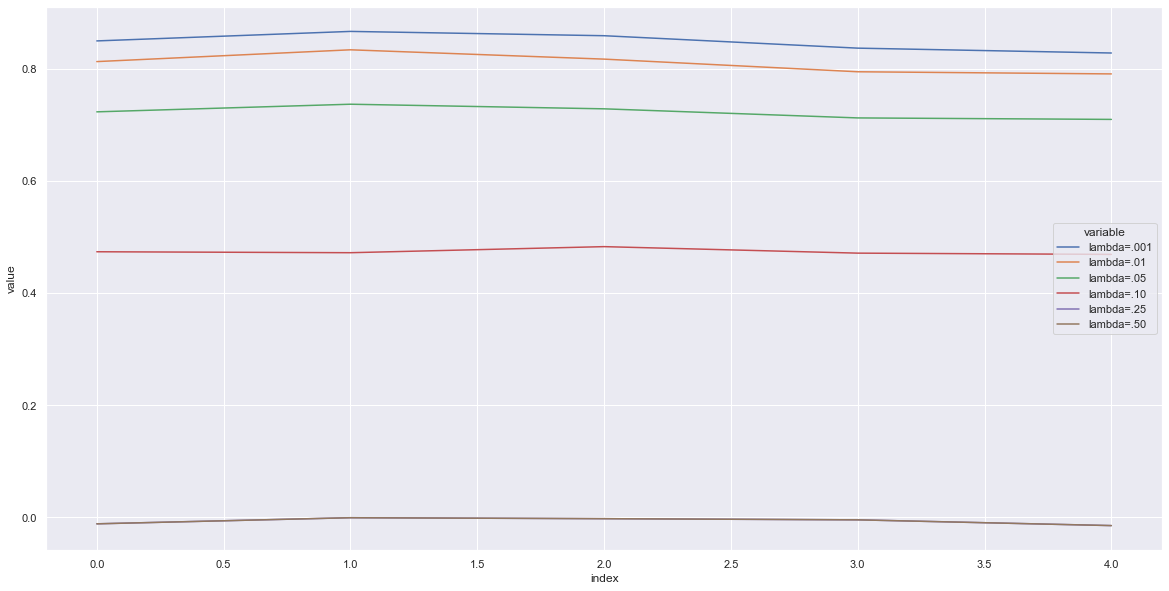

In [40]:
# CodeBlock SubSection 6.1
# plotting line chart

plt.figure(figsize=(20,10))
sns.set(style='darkgrid', palette='deep',)
sns.lineplot(x = 'index', y = 'value', hue = 'variable', data=df_lassoscores_melt)

In [41]:
# CodeBlock SubSection 6.1
# plotting stats on cross validation results

print('Statistics on Cross Validation Results')
df_lassoscores.describe()

Statistics on Cross Validation Results


,lambda=.001,lambda=.01,lambda=.05,lambda=.10,lambda=.25,lambda=.50
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.847656,0.809494,0.721764,0.473406,-0.006964,-0.006964
std,0.015737,0.017534,0.011258,0.005343,0.006079,0.006079
min,0.827746,0.790465,0.709357,0.468660,-0.014922,-0.014922
25%,0.836408,0.794291,0.712000,0.470890,-0.011766,-0.011766
50%,0.849302,0.812419,0.722830,0.471653,-0.004661,-0.004661
75%,0.858575,0.816840,0.728207,0.473352,-0.002593,-0.002593
max,0.866251,0.833453,0.736428,0.482476,-0.000880,-0.000880


In [42]:
# CodeBlock SubSection 6.1
# showing stats for df_lasso_barplot

df_lasso_barplot = df_lassoscores.describe().T
df_lasso_barplot = df_lasso_barplot.reset_index()
df_lasso_barplot

,index,count,mean,std,min,25%,50%,75%,max
0,lambda=.001,5.0,0.847656,0.015737,0.827746,0.836408,0.849302,0.858575,0.866251
1,lambda=.01,5.0,0.809494,0.017534,0.790465,0.794291,0.812419,0.816840,0.833453
2,lambda=.05,5.0,0.721764,0.011258,0.709357,0.712000,0.722830,0.728207,0.736428
3,lambda=.10,5.0,0.473406,0.005343,0.468660,0.470890,0.471653,0.473352,0.482476
4,lambda=.25,5.0,-0.006964,0.006079,-0.014922,-0.011766,-0.004661,-0.002593,-0.000880
5,lambda=.50,5.0,-0.006964,0.006079,-0.014922,-0.011766,-0.004661,-0.002593,-0.000880


In [43]:
# CodeBlock SubSection 6.1
# grid search for best alpha score

# Define technique to be used
reg_model = Lasso(fit_intercept=True, normalize=True, max_iter=3000)
# Define cross validation approach
crossval = RepeatedKFold(n_splits=5, n_repeats=4, random_state=42)
# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange( .001, .01, 0.05)
# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=crossval, n_jobs=-1)
search_results = search.fit(X, y)
# Show "optimal" hyperparameter setting and performance measure
print('Best Lasso Regression Hyperparameter Setting from Grid Search')
print('Lasso Config: %s' % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Lasso Regression Hyperparameter Setting from Grid Search
Lasso Config: {'alpha': 0.001}
Best Value for Scoring Method: 0.84993


In [44]:
# CodeBlock SubSection 6.1
# setting the parameters for alpha 0.001 as best optimal alpha

lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=True, max_iter=3000)

# 6.2 Parameter tuning to find the most significant features
o Using your optimal model from section 6.1 as a starting point, change the
necessary parameters to reduce a fair number of coefficients so that just the
significant features that you feel best explain the target variable are evident.

In [45]:
# CodeBlock SubSection 6.1
# rerunning lasso model score with alpha 0.01
lasso = Lasso(alpha= 0.01, fit_intercept=True, normalize=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso_1 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_1 = pd.concat([names, df_lasso_1], axis = 1)
df_lasso_1.columns = ['Feature', 'lasso_coeff_1']
df_lasso_1 = df_lasso_1.sort_values(by='lasso_coeff_1', ascending = False)
df_lasso_1

Lasso R Sq. Score ---------

0.8109116193044906

---------------------------


,Feature,lasso_coeff_1
91,"Enrolled in college, undergraduate years",5.253064
3,call_ALL,0.740330
108,call_ALL_comp,0.008129
80,Population,0.000044
68,disp_Other,-0.000000
...,...,...
30,call_Fight,0.000000
109,call_Burglary_comp,0.000000
103,HouseholdIncome_Median,-0.000006
107,Income_PerCapita,-0.000060


In [46]:
# CodeBlock SubSection 6.1
# rerunning lasso model score with alpha 0.001

lasso = Lasso(alpha= .001, fit_intercept=True, normalize=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso_001 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_001 = pd.concat([names, df_lasso_001], axis = 1)
df_lasso_001.columns = ['Feature', 'lasso_coeff_001']
df_lasso_001 = df_lasso_001.sort_values(by='lasso_coeff_001', ascending = False)
df_lasso_001

Lasso R Sq. Score ---------

0.8506184403152103

---------------------------


,Feature,lasso_coeff_001
95,Households_wageorsalaryincome,67.801756
99,Households_publicassistanceincome,32.555072
91,"Enrolled in college, undergraduate years",30.012324
81,Population_Male,15.252510
73,disp_SAT-SETTLED AMONG SELVES,1.903453
...,...,...
68,disp_Other,-0.504978
61,disp_IRT Report,-0.605392
89,"Enrolled in nursery school, preschool",-36.457641
86,Carpooled to Work,-42.025668


In [47]:
# CodeBlock SubSection 6.1
# showing coeff not equal to 0 when alpha = .001
df_lasso_001[df_lasso_001['lasso_coeff_001']!=0]

,Feature,lasso_coeff_001
95,Households_wageorsalaryincome,67.801756
99,Households_publicassistanceincome,32.555072
91,"Enrolled in college, undergraduate years",30.012324
81,Population_Male,15.252510
73,disp_SAT-SETTLED AMONG SELVES,1.903453
75,disp_TI -TOW IN,0.879760
102,MedianAge_Female,0.573981
3,call_ALL,0.364931
2,YEAR,0.265338
59,disp_FI-FIELD INTERVIEW,0.259571


In [100]:
# CodeBlock SubSection 6.1
# showing coeff equal to zero 
df_lasso_001[df_lasso_001['lasso_coeff_001']==0]

,Feature,lasso_coeff_001
77,disp_VA Hospital Alarm (Fire),-0.0
70,disp_RES-RESOLVED,0.0
69,disp_PR-PROPERTY RETURNED,0.0
72,disp_Runaway juvenile (entered NCIC),0.0
60,disp_Gone on Arrival,-0.0
104,HouseholdIncome_Median_25to44,-0.0
76,disp_Truancy,0.0
62,disp_K9 Report,-0.0
96,Households_selfemploymentincome,0.0
98,Households_SSI,0.0


In [48]:
# CodeBlock SubSection 6.1
# rerunning lasso model with alpha = 0.05

lasso = Lasso(alpha= 0.05, fit_intercept=True, normalize=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso_05 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_05 = pd.concat([names, df_lasso_05], axis = 1)
df_lasso_05.columns = ['Feature', 'lasso_coeff_05']
df_lasso_05 = df_lasso_05.sort_values(by='lasso_coeff_05', ascending = False)
df_lasso_05

Lasso R Sq. Score ---------

0.7305769582924481

---------------------------


,Feature,lasso_coeff_05
3,call_ALL,0.625685
0,WEEK,-0.000000
70,disp_RES-RESOLVED,0.000000
81,Population_Male,-0.000000
80,Population,0.000000
...,...,...
34,call_Possible drugs present,0.000000
33,call_Noise complaint,0.000000
32,call_Message delivery,0.000000
31,call_Loitering,0.000000


In [49]:
# CodeBlock SubSection 6.1
# number of columns when coeff not equal to 0

df_lasso_05[df_lasso_05['lasso_coeff_05']!=0]

,Feature,lasso_coeff_05
3,call_ALL,0.625685


# 7.1 Finding the appropriate technique and parameter tuning
• Using the regression techniques that create the best model that predicts the target
variable.
• Use inertia models, cross validation, and grid searches to identify the optimal model for
prediction for call_ALL_target.

iteration 0.005 done
iteration 0.01 done
iteration 0.05 done
iteration 0.1 done
iteration 0.25 done
iteration 0.5 done


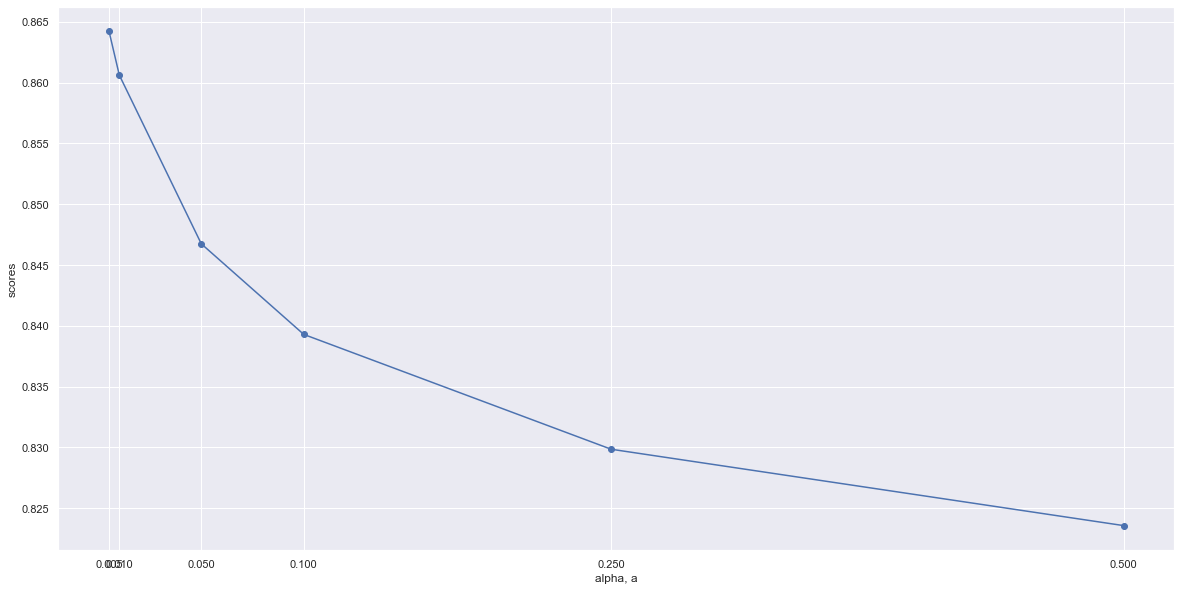

In [50]:
# CodeBlock SubSection 7.1
# Running ridge plot

plt.figure(figsize=(20,10))
alphas = [ 0.005, 0.01, 0.05, 0.1, 0.25, 0.5]
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []
for a in alphas:
 ridge = Ridge(alpha = a, fit_intercept=True, normalize = True)
 ridge.fit(X_train, y_train)
 scores.append(ridge.score(X_test, y_test))
 print("iteration {} done".format(a))
    
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [51]:
# CodeBlock SubSection 7.1
# Running ridge plot

# Using 10-fold cross-validation, calculate the r-squared values for the test fold. There
# will be 10 r-squared values for each model. Evaluate models at different levels of
# lambda (alpha).
rdscores001 = cross_val_score(Ridge(fit_intercept=True, normalize=True, max_iter=3000, alpha=
.001), X, y, cv=10, scoring = 'r2')
rdscores01 = cross_val_score(Ridge(fit_intercept=True, normalize=True, max_iter=3000, alpha=
0.01), X, y, cv=10, scoring = 'r2')
rdscores05 = cross_val_score(Ridge(fit_intercept=True, normalize=True, max_iter=3000, alpha=
0.05), X, y, cv=10, scoring = 'r2')
# Put r-squared values into a dataframe with headers
scores_list = {'lambda=.001': rdscores001,'lambda=.01': rdscores01,'lambda=.05': rdscores05}
df_ridgescores = pd.DataFrame(scores_list)
# Show results of 10 runs for each lambda (alpha) level
print('Ridge Regression Results')
df_ridgescores

Ridge Regression Results


,lambda=.001,lambda=.01,lambda=.05
0,0.860309,0.852673,0.838554
1,0.876872,0.871159,0.859880
2,0.879019,0.874036,0.862150
3,0.882617,0.878366,0.866382
4,0.873512,0.869503,0.855050
5,0.878749,0.873124,0.857839
6,0.846618,0.838898,0.823689
7,0.860918,0.855000,0.840057
8,0.857824,0.852293,0.842699
9,0.826086,0.822848,0.814829


In [52]:
# CodeBlock SubSection 7.1
# creating high light function
def highlight_max(s):
 '''
 highlight the maximum in a Series yellow.
 '''
 is_max = s == s.max()
 return ['background-color: yellow' if v else '' for v in is_max]

In [53]:
# CodeBlock SubSection 7.1
# ridge scores with highlights

df_ridgescores.T.style.set_table_styles([{'selector': 'td', 'props': [('font-family', 'avenir'
)]}]).apply(highlight_max)

,0,1,2,3,4,5,6,7,8,9
lambda=.001,0.860309,0.876872,0.879019,0.882617,0.873512,0.878749,0.846618,0.860918,0.857824,0.826086
lambda=.01,0.852673,0.871159,0.874036,0.878366,0.869503,0.873124,0.838898,0.855000,0.852293,0.822848
lambda=.05,0.838554,0.859880,0.862150,0.866382,0.855050,0.857839,0.823689,0.840057,0.842699,0.814829


In [54]:
# CodeBlock SubSection 7.1
# df_ridgescores_chart

df_ridgescores_chart = df_ridgescores.reset_index()
lasso_columns = df_ridgescores.columns
df_ridgescores_melt =pd.melt(df_ridgescores_chart, id_vars=['index'], \
value_vars=lasso_columns)
df_ridgescores_melt.head()

,index,variable,value
0,0,lambda=.001,0.860309
1,1,lambda=.001,0.876872
2,2,lambda=.001,0.879019
3,3,lambda=.001,0.882617
4,4,lambda=.001,0.873512


<AxesSubplot:xlabel='index', ylabel='value'>

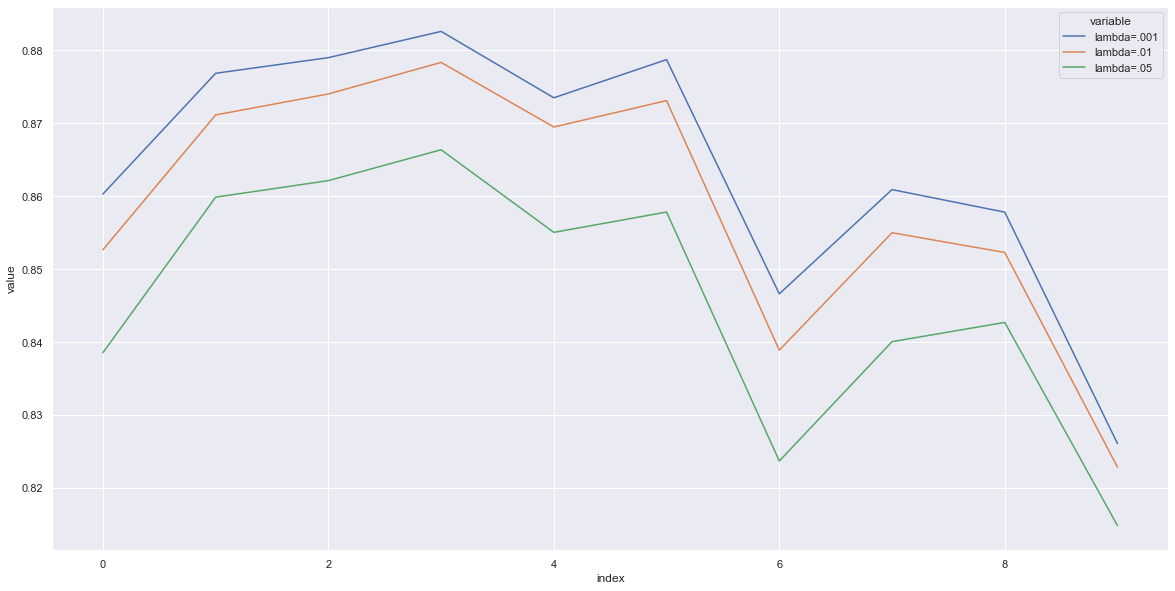

In [55]:
# CodeBlock SubSection 7.1
# lineplot

plt.figure(figsize=(20,10))
sns.set(style='darkgrid', palette='deep',)
sns.lineplot(x = 'index', y = 'value', hue = 'variable', data=df_ridgescores_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

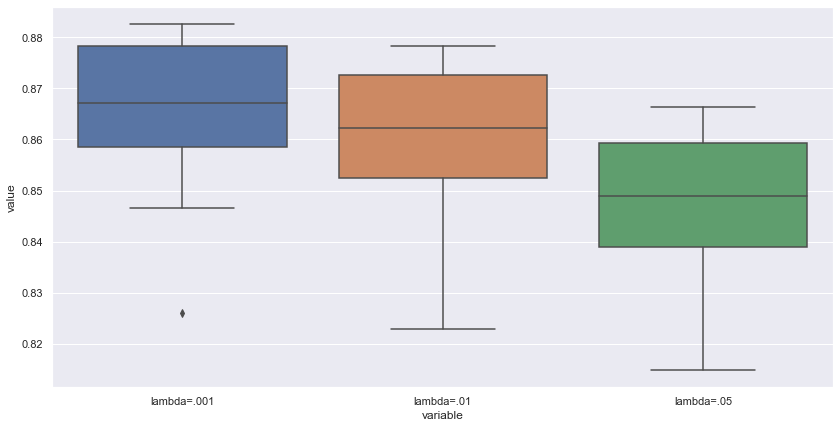

In [56]:
# CodeBlock SubSection 7.1
# boxplot for ridge scores

plt.figure(figsize=(14,7))
sns.set(style='darkgrid', palette='deep',)
sns.boxplot(x = 'variable', y = 'value', data=df_ridgescores_melt)

In [57]:
# CodeBlock SubSection 7.1
# grid search for ridge score for best alpha score

reg_model = Ridge(fit_intercept=True, normalize=True, max_iter=3000)
# Define cross validation approach
crossval = RepeatedKFold(n_splits=10, n_repeats=4, random_state=42)
# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(.001, .01, .05)
# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=crossval, n_jobs=-1)
search_results = search.fit(X, y)
# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s' % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 0.001}
Best Value for Scoring Method: 0.86768


In [58]:
# CodeBlock SubSection 7.1
# setting ridge to alpha 0.001

ridge = Ridge(alpha=0.001, fit_intercept=True, normalize=True, max_iter=3000)

# 7.2 Predict and Analyze the results
• Using your models from section 7.1, create a dataframe that include selective columns
from X_test, y_test, and your predictive values of y for test. Name it df_results, which
may include:
o Actual call_ALL_target
o A few features that are most significant to the target variable (from section 6).
o Predictions for call_ALL_target for the different models (from section 7).
o Residuals for the different models.
o Prediction intervals for a low and high prediction for the target variable.
• Analyze the results from df_results to see if the predictions should be used to predict
the number of crimes with at least one visualization.

In [59]:
# CodeBlock SubSection 7.2
# fitting ridge to x and y train
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=3000, normalize=True)

In [60]:
# CodeBlock SubSection 7.2
# creating ridge_pred

ridge_pred = ridge.predict(X_test)
ridge_pred

array([ 6.0698566 ,  1.49191718, 14.61701307, ...,  5.76368105,
       12.7835211 ,  4.19076919])

In [61]:
# CodeBlock SubSection 7.2
# creating ridge_pred

df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
display(df_ridge_pred.head())
df_ridge_pred.shape

,ridge_pred
0,6.069857
1,1.491917
2,14.617013
3,37.492859
4,21.171212


(3555, 1)

In [62]:
# CodeBlock SubSection 7.2
# creating df_target

df_target = pd.DataFrame(y_test).reset_index()
display(df_target.head())
df_target.shape

,index,call_ALL_target
0,8188,3
1,900,1
2,3898,11
3,9792,41
4,2820,17


(3555, 2)

In [63]:
# CodeBlock SubSection 7.2
# creating df_results

df_results = pd.concat([df_target, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['call_ALL_target'] - df_results['ridge_pred']
df_results

,index,call_ALL_target,ridge_pred,ridge_resid
0,8188,3,6.069857,-3.069857
1,900,1,1.491917,-0.491917
2,3898,11,14.617013,-3.617013
3,9792,41,37.492859,3.507141
4,2820,17,21.171212,-4.171212
...,...,...,...,...
3550,842,45,41.186481,3.813519
3551,2930,25,17.463329,7.536671
3552,6762,4,5.763681,-1.763681
3553,58,12,12.783521,-0.783521


<Figure size 1440x576 with 0 Axes>

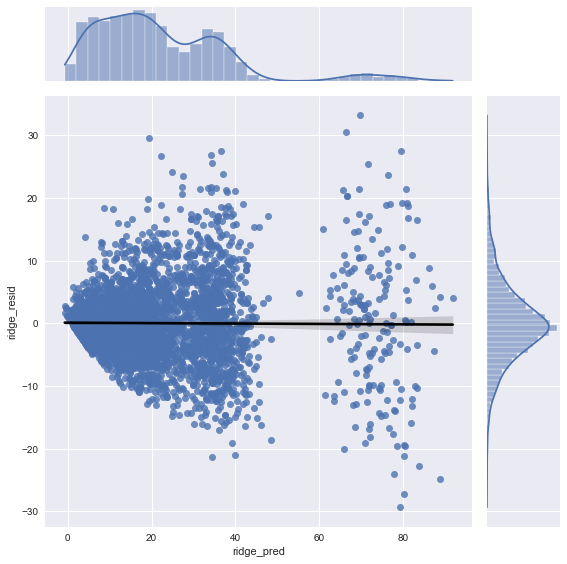

In [64]:
# CodeBlock SubSection 7.2
# creating jointplot

plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='ridge_resid', x='ridge_pred',kind='reg', data= df_results, ratio=5, height = 8, line_kws={'color': 'black'})

# 7.3 Insights for Section 6 and 7
• In markdown explain the final lasso and ridge regression model that best predicts the
target variables.
• What are the most significant features?
• Explain interesting insight that you see from df_results

 In the lasso regression when alpha is set to 0.001. The lasso coefficient value of Graduate or professional school is -56.938071, which suggests that the more educated the population is the lesser of number of calls; conversely, the lesser the education, the greater the number of crime calls. Carpooled to Work feature has a lasso coefficient value of -42.025668, which seems to suggest that the more car pool to work, the lesser number of crime calls; conversely, the lesser the number of car pools to work, the greater the crime calls.

 In the results for ridge regression results indicate that the higher number of calls from the target variable (call all target) the higher ridge coefficient value; for example when the number of calls is 41 the ridge coefficient is 41.186481, which seems to suggest that the greater the validity of the regression model. Conversely, the lower the number of calls, the lower the ridge coefficient; for example, the number of calls of 1 has a ridge coefficient of 1.491917, which seems to suggest that the lesser the validity of the regression model.


# 8.1 Predict Week 51
• Using the df_canton_new dataset:
o Create a dataframe that includes the same columns as the X dataset. Name it
X_new.
• Using X_new, create a prediction for each Subzone.
HW03 – Predicting with the Crime Dataset
6
o You do not need to fit a new model, just use that model to predict. You cannot
assess since you do not know the call_ALL_target for Week 51.

In [65]:
# CodeBlock SubSection 8.1
# importing GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.025
UPPER_ALPHA = 0.975
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",
alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
alpha= UPPER_ALPHA)

In [66]:
# CodeBlock SubSection 8.1
# checking data
df_canton_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 113 entries, SUB_YEAR_WEEK to call_Burglary_comp
dtypes: float64(18), int64(92), object(3)
memory usage: 18.7+ KB


In [67]:
# CodeBlock SubSection 8.1
# checking data
df_canton_new.head()

,SUB_YEAR_WEEK,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
0,2018_50_ZONE5B,ZONE5B,50,12,2018,2018_50,38,4,3,6,6,8,7,4,0,0,0,0,0,0,0,0,0,0,0,38,0,0,2,2,1,8,0,0,0,1,1,2,0,0,2,0,0,0,10,1,1,7,3,0,0,3,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,6,6,0,0,7,8,0,0,0,0,0,0,7.126647e+07,233,9783,0.538485,0.461515,4522,0.984299,0.806502,0.137107,9206,0.360200,0.025092,0.017054,0.162177,0.044319,0.639800,3021,0.974181,0.072824,0.113870,0.042370,0.096326,27,27,28,29922,37845.00000,29634,47085,17043,228,12
1,2018_50_ZONE1C,ZONE1C,50,12,2018,2018_50,26,8,3,4,4,2,2,3,0,0,0,0,0,0,0,0,0,0,0,26,0,3,3,0,1,1,0,0,0,0,3,1,0,0,0,0,0,0,9,1,0,4,5,0,0,1,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,4,0,0,7,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,260,0
2,2018_50_ZONE6C,ZONE6C,50,12,2018,2018_50,29,9,3,4,2,1,5,6,0,0,0,0,0,0,0,0,0,0,0,30,0,1,4,0,0,1,0,0,0,1,3,1,0,0,0,0,0,0,10,1,2,6,0,0,0,2,1,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,6,0,0,8,1,0,0,0,0,0,0,8.392070e+07,176,7759,0.447609,0.552391,3688,0.962039,0.891811,0.042570,7608,0.218191,0.009989,0.024711,0.046793,0.005783,0.781809,2492,0.936196,0.184992,0.292937,0.046549,0.023274,38,37,40,48009,47873.00000,47555,54849,25295,232,0
3,2018_50_ZONE3E,ZONE3E,50,12,2018,2018_50,68,14,7,15,4,8,8,11,0,0,0,0,0,0,0,0,0,0,0,67,0,1,4,1,1,18,0,0,0,2,3,2,0,1,2,0,0,1,17,2,3,9,4,1,1,1,2,0,1,0,0,0,0,0,4,0,0,0,0,0,1,0,1,10,17,0,0,9,15,0,0,0,0,0,0,8.508794e+07,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.00000,62030,58637,15470,408,6
4,2018_50_ZONE7C,ZONE7C,50,12,2018,2018_50,21,2,4,4,3,5,3,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,2,0,1,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,4,0,0,3,2,0,0,0,0,0,0,5.363035e+07,238,8040,0.478234,0.521766,3991,0.950138,0.842145,0.095966,7621,0.267419,0

In [68]:
# CodeBlock SubSection 8.1
# checking data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11847 entries, 0 to 11846
Columns: 110 entries, WEEK to call_Burglary_comp
dtypes: float64(18), int64(92)
memory usage: 9.9 MB


In [70]:
# CodeBlock SubSection 8.1
# importing df_canton_new again 

df_canton_new = pd.read_csv('data/CantonPoliceDept_HW03_Week51.csv', index_col = None, header = 0 )
df_canton_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 113 entries, SUB_YEAR_WEEK to call_Burglary_comp
dtypes: float64(18), int64(92), object(3)
memory usage: 18.7+ KB


In [71]:
# CodeBlock SubSection 8.1
# checking data

df_canton_new.head()

,SUB_YEAR_WEEK,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
0,2018_50_ZONE5B,ZONE5B,50,12,2018,2018_50,38,4,3,6,6,8,7,4,0,0,0,0,0,0,0,0,0,0,0,38,0,0,2,2,1,8,0,0,0,1,1,2,0,0,2,0,0,0,10,1,1,7,3,0,0,3,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,6,6,0,0,7,8,0,0,0,0,0,0,7.126647e+07,233,9783,0.538485,0.461515,4522,0.984299,0.806502,0.137107,9206,0.360200,0.025092,0.017054,0.162177,0.044319,0.639800,3021,0.974181,0.072824,0.113870,0.042370,0.096326,27,27,28,29922,37845.00000,29634,47085,17043,228,12
1,2018_50_ZONE1C,ZONE1C,50,12,2018,2018_50,26,8,3,4,4,2,2,3,0,0,0,0,0,0,0,0,0,0,0,26,0,3,3,0,1,1,0,0,0,0,3,1,0,0,0,0,0,0,9,1,0,4,5,0,0,1,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,4,0,0,7,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,260,0
2,2018_50_ZONE6C,ZONE6C,50,12,2018,2018_50,29,9,3,4,2,1,5,6,0,0,0,0,0,0,0,0,0,0,0,30,0,1,4,0,0,1,0,0,0,1,3,1,0,0,0,0,0,0,10,1,2,6,0,0,0,2,1,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,6,0,0,8,1,0,0,0,0,0,0,8.392070e+07,176,7759,0.447609,0.552391,3688,0.962039,0.891811,0.042570,7608,0.218191,0.009989,0.024711,0.046793,0.005783,0.781809,2492,0.936196,0.184992,0.292937,0.046549,0.023274,38,37,40,48009,47873.00000,47555,54849,25295,232,0
3,2018_50_ZONE3E,ZONE3E,50,12,2018,2018_50,68,14,7,15,4,8,8,11,0,0,0,0,0,0,0,0,0,0,0,67,0,1,4,1,1,18,0,0,0,2,3,2,0,1,2,0,0,1,17,2,3,9,4,1,1,1,2,0,1,0,0,0,0,0,4,0,0,0,0,0,1,0,1,10,17,0,0,9,15,0,0,0,0,0,0,8.508794e+07,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.00000,62030,58637,15470,408,6
4,2018_50_ZONE7C,ZONE7C,50,12,2018,2018_50,21,2,4,4,3,5,3,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,2,0,1,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,4,0,0,3,2,0,0,0,0,0,0,5.363035e+07,238,8040,0.478234,0.521766,3991,0.950138,0.842145,0.095966,7621,0.267419,0

In [72]:
# CodeBlock SubSection 8.1
# checking data

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 2865 to 7270
Columns: 110 entries, WEEK to call_Burglary_comp
dtypes: float64(18), int64(92)
memory usage: 7.0 MB


In [73]:
# CodeBlock SubSection 8.1
# checking data

X_train.head()

,WEEK,MONTH,YEAR,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLOD MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp
2865,14,4,2011,74,7,8,16,8,7,15,7,0,0,0,68,0,0,0,0,0,0,0,0,0,3,12,1,2,15,0,0,1,2,10,1,2,2,0,0,3,0,9,0,2,3,0,0,0,1,0,1,3,0,3,0,0,5,12,0,0,1,0,0,0,0,1,8,19,1,0,9,4,0,0,0,0,0,0,85087944.85,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.0,62030,58637,15470,444,6
4341,28,7,2012,12,4,2,5,0,1,2,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,5,0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,1,1,3,0,0,2,1,0,0,0,0,0,0,53630347.61,238,8040,0.478234,0.521766,3991,0.950138,0.842145,0.095966,7621,0.267419,0.014959,0.015090,0.037265,0.014171,0.732581,2452,0.987765,0.105628,0.201060,0.024470,0.033850,36,36,36,79633,85153.0,51478,89011,30844,36,0
6388,18,4,2014,5,3,1,0,2,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,10,0
2291,40,10,2010,5,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,10,2
6375,17,4,2014,2,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,27419461.49,67,3317,0.464878,0.535122,1574,0.986658,0.874206,0.099746,3154,0.312619,0.033925,0.014268,0.046607,0.026950,0.687381,869,0.983890,0.158803,0.263521,0.057537,0.040276,34,33,35,82265,93336.0,74572,76682,25427,4,0


In [80]:
# CodeBlock SubSection 8.1
# creating X_new and y_new_lasso
df_canton_new_clean = df_canton_new.drop(['Subzone', 'YEAR_WEEK', 'SUB_YEAR_WEEK' ], axis = 1)
X_new = df_canton_new_clean
X_new.head()
y_new_lasso = lasso.predict(X_new)

In [78]:
# CodeBlock SubSection 8.1
# checking info
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 110 entries, WEEK to call_Burglary_comp
dtypes: float64(18), int64(92)
memory usage: 18.2 KB


In [81]:
# CodeBlock SubSection 8.1
# checking data
y_new_lasso

array([32.08328205, 24.57506685, 26.45212065, 50.85382005, 21.44664385,
       22.07232845, 27.70348985, 14.56411325, 38.34012805, 23.32369765,
       29.58054365, 27.70348985, 30.83191285, 35.83738965, 14.56411325,
       18.94390545, 10.18432105, 18.94390545, 16.44116705, 12.68705945,
       12.06137485])

In [82]:
# CodeBlock SubSection 8.1
# creating y_new_ridge

y_new_ridge = ridge.predict(X_new)
y_new_ridge

array([35.90638881, 31.28017518, 30.95712075, 69.31306021, 13.63705746,
       23.68926591, 33.31911562, 13.26013783, 31.92010735, 20.92734661,
       31.45007626, 21.93197721, 25.23886363, 37.07632738,  8.59123051,
       17.81707637,  4.49362071, 17.32060912, 17.13848101, 12.03836982,
        7.28272487])

In [91]:
# CodeBlock SubSection 8.1
# I attempted to create the lower, mid and upper reg but it requires me to fit the model again 
# the HW assignment says I don't need to fit the model so Im not sure what to do.
# I would like to know more about how this should have been coded later. 


#lower_reg = lower_model.fit(X_new, y_new_ridge)
#mid_reg = mid_model.fit(X_new, y_new_ridge)
#upper_reg = upper_model.fit(X_new, y_new_ridge)

ValueError: could not convert string to float: '2018_50_ZONE5B'

In [85]:
# CodeBlock SubSection 8.1
# creating lasso and ridge prediction

pred_new['lasso_pred'] = lasso.predict(X_new)
pred_new['ridge_pred'] = ridge.predict(X_new)
#pred_new['gb_lower_pred'] = lower_reg.predict(X_new)
#pred_new['gb_mid_pred'] = mid_reg.predict(X_new)
#pred_new['gb_upper_pred'] = upper_reg.predict(X_new)
pred_new

,0,ridge_pred,lasso_pred
0,32.083282,35.906389,32.083282
1,24.575067,31.280175,24.575067
2,26.452121,30.957121,26.452121
3,50.853820,69.313060,50.853820
4,21.446644,13.637057,21.446644
5,22.072328,23.689266,22.072328
6,27.703490,33.319116,27.703490
7,14.564113,13.260138,14.564113
8,38.340128,31.920107,38.340128
9,23.323698,20.927347,23.323698


In [86]:
# CodeBlock SubSection 8.1
# showing just ride and lasso prediction

pred_new = pred_new[['ridge_pred', 'lasso_pred']]
pred_new

,ridge_pred,lasso_pred
0,35.906389,32.083282
1,31.280175,24.575067
2,30.957121,26.452121
3,69.313060,50.853820
4,13.637057,21.446644
5,23.689266,22.072328
6,33.319116,27.703490
7,13.260138,14.564113
8,31.920107,38.340128
9,20.927347,23.323698


In [88]:
# CodeBlock SubSection 8.1
# concatinating df_canton_new and pred_new as X_new

X_new = pd.concat([df_canton_new, pred_new], axis = 1)
X_new

,SUB_YEAR_WEEK,Subzone,WEEK,MONTH,YEAR,YEAR_WEEK,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita,call_ALL_comp,call_Burglary_comp,ridge_pred,lasso_pred
0,2018_50_ZONE5B,ZONE5B,50,12,2018,2018_50,38,4,3,6,6,8,7,4,0,0,0,0,0,0,0,0,0,0,0,38,0,0,2,2,1,8,0,0,0,1,1,2,0,0,2,0,0,0,10,1,1,7,3,0,0,3,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,6,6,0,0,7,8,0,0,0,0,0,0,7.126647e+07,233,9783,0.538485,0.461515,4522,0.984299,0.806502,0.137107,9206,0.360200,0.025092,0.017054,0.162177,0.044319,0.639800,3021,0.974181,0.072824,0.113870,0.042370,0.096326,27,27,28,29922,37845.00000,29634,47085,17043,228,12,35.906389,32.083282
1,2018_50_ZONE1C,ZONE1C,50,12,2018,2018_50,26,8,3,4,4,2,2,3,0,0,0,0,0,0,0,0,0,0,0,26,0,3,3,0,1,1,0,0,0,0,3,1,0,0,0,0,0,0,9,1,0,4,5,0,0,1,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,4,0,0,7,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181,260,0,31.280175,24.575067
2,2018_50_ZONE6C,ZONE6C,50,12,2018,2018_50,29,9,3,4,2,1,5,6,0,0,0,0,0,0,0,0,0,0,0,30,0,1,4,0,0,1,0,0,0,1,3,1,0,0,0,0,0,0,10,1,2,6,0,0,0,2,1,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,6,0,0,8,1,0,0,0,0,0,0,8.392070e+07,176,7759,0.447609,0.552391,3688,0.962039,0.891811,0.042570,7608,0.218191,0.009989,0.024711,0.046793,0.005783,0.781809,2492,0.936196,0.184992,0.292937,0.046549,0.023274,38,37,40,48009,47873.00000,47555,54849,25295,232,0,30.957121,26.452121
3,2018_50_ZONE3E,ZONE3E,50,12,2018,2018_50,68,14,7,15,4,8,8,11,0,0,0,0,0,0,0,0,0,0,0,67,0,1,4,1,1,18,0,0,0,2,3,2,0,1,2,0,0,1,17,2,3,9,4,1,1,1,2,0,1,0,0,0,0,0,4,0,0,0,0,0,1,0,1,10,17,0,0,9,15,0,0,0,0,0,0,8.508794e+07,270,16443,0.488050,0.511950,8145,0.975445,0.805402,0.095887,15628,0.558677,0.012414,0.003455,0.406578,0.020668,0.441323,4564,0.976994,0.095092,0.132340,0.035933,0.038344,23,23,23,35085,39587.00000,62030,58637,15470,408,6,69.313060,50.853820
4,2018_50_ZONE7C,ZONE7C,50,12,2018,2018_50,21,2,4,4,3,5,3,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,2,0,1,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,4,0,0,3

In [90]:
# CodeBlock SubSection 8.1
# viewing subzone ridge and lasso predictions

X_new[['Subzone', 'ridge_pred', 'lasso_pred']]

,Subzone,ridge_pred,lasso_pred
0,ZONE5B,35.906389,32.083282
1,ZONE1C,31.280175,24.575067
2,ZONE6C,30.957121,26.452121
3,ZONE3E,69.313060,50.853820
4,ZONE7C,13.637057,21.446644
5,ZONE1B,23.689266,22.072328
6,ZONE1A,33.319116,27.703490
7,ZONE5C,13.260138,14.564113
8,ZONE4C,31.920107,38.340128
9,ZONE5A,20.927347,23.323698


# 8.2 Show the results for Week 51
• Create a dataframe that includes, the same columns that you included in df_results and
name it df_results_new.
o Since you do not have an actual call_ALL_target, you cannot include the actual
total crimes in df_results_new.
• Identify the predictions for the top 5 crime Subzones and visualize or summarize the
results.


In [93]:
# CodeBlock SubSection 8.2
# creating df_results_new

df_results_new = X_new[['Subzone', 'ridge_pred', 'lasso_pred']]
df_results_new

,Subzone,ridge_pred,lasso_pred
0,ZONE5B,35.906389,32.083282
1,ZONE1C,31.280175,24.575067
2,ZONE6C,30.957121,26.452121
3,ZONE3E,69.313060,50.853820
4,ZONE7C,13.637057,21.446644
5,ZONE1B,23.689266,22.072328
6,ZONE1A,33.319116,27.703490
7,ZONE5C,13.260138,14.564113
8,ZONE4C,31.920107,38.340128
9,ZONE5A,20.927347,23.323698


Text(0, 0.5, 'Subzones')

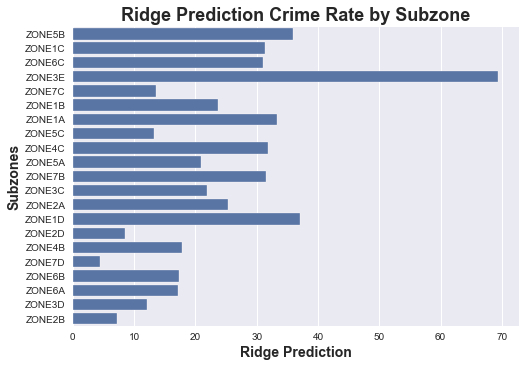

In [95]:
# CodeBlock SubSection 8.2
# creating barplot for ridge_pred by subzone

sns.barplot(x= 'ridge_pred', y= 'Subzone', data = df_results_new, color = 'b')
plt.title('Ridge Prediction Crime Rate by Subzone', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Ridge Prediction', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Subzones', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')


Text(0, 0.5, 'Subzones')

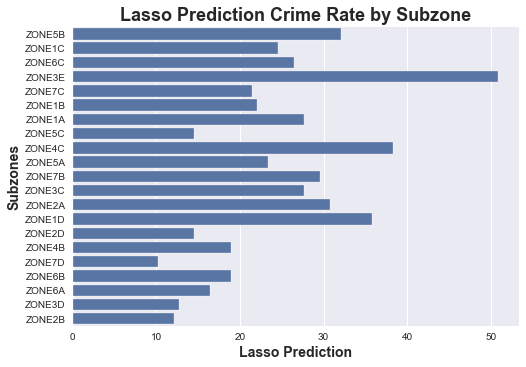

In [97]:
# CodeBlock SubSection 8.2
# creating barplot for lasso_pred by subzone

sns.barplot(x= 'lasso_pred', y= 'Subzone', data = df_results_new, color = 'b')
plt.title('Lasso Prediction Crime Rate by Subzone', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Lasso Prediction', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Subzones', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

# 8.3 Summary for Section 8
• In markdown explain the final results for Week51.
• Explain interesting insight that you see from df_results_new.
• Provide any final comments, including overall modeling, predictions, and anything
interesting about the results for all Subzones or for the top 5 crime Subzones


 Based on the ridge prediction chart, one can conclude that the validity of the regression model is greater for subzone ZONE3E, followed by ZONE1D, followed by ZONE5B, followed by ZONE1C and ZONE6C; conversely, the validity of the regression model is least effective for ZONE7D. Based on these finding, Subzone ZONE3E, ZONE1D, ZONE5B, ZONE1C and ZONE6C the predictive modeling analysis should focus on these zones. 

  The lasso prediction chart seems to suggest that the validity of selecting feature variables to predict the target variable (call all target) will have a higher degree of success for subzones ZONE3E followed by ZONE4C, followed by ZONE1D, followed by ZONE5B, followed by ZONE1A. Conversely, the validity of selecting feature variables would be least effective for ZONE7D.

 Based on this information, would could recommend the specified subzones should be analyzed with predictive models and for the C.P.D. to make a decision on how to allocate resources to the project.
